<a href="https://colab.research.google.com/github/GabrielCandido97/Portfolio_Data_Science/blob/main/Analisando_os_Dados_do_Airbnb_Berlim.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

<img alt="Colaboratory logo" width="15%" src="https://raw.githubusercontent.com/carlosfab/escola-data-science/master/img/novo_logo_bg_claro.png">

#### **Data Science na Prática 3.0**
*by [sigmoidal.ai](https://sigmoidal.ai)*

---

# Análise dos Dados do Airbnb - *Berlim*

O [Airbnb](https://www.airbnb.com.br/) já é considerado como sendo a **maior empresa hoteleira da atualidade**. Ah, o detalhe é que ele **não possui nenhum hotel**!

Conectando pessoas que querem viajar (e se hospedar) com anfitriões que querem alugar seus imóveis de maneira prática, o Airbnb fornece uma plataforma inovadora para tornar essa hospedagem alternativa.

No final de 2018, a Startup fundada 10 anos atrás, já havia **hospedado mais de 300 milhões** de pessoas ao redor de todo o mundo, desafiando as redes hoteleiras tradicionais.

Uma das iniciativas do Airbnb é disponibilizar dados do site, para algumas das principais cidades do mundo. Por meio do portal [Inside Airbnb](http://insideairbnb.com/get-the-data.html), é possível baixar uma grande quantidade de dados para desenvolver projetos e soluções de *Data Science*.

<center><img alt="Analisando Airbnb" width="10%" src="https://www.area360.com.au/wp-content/uploads/2017/09/airbnb-logo.jpg"></center>

**Neste *notebook*, iremos analisar os dados referentes à cidade de Berlin na Alemanha, e ver quais insights podem ser extraídos a partir de dados brutos.**

<center><img alt="Berlim" width="80%" src="https://github.com/GabrielCandido97/Portfolio_Data_Science/blob/main/o-que-fazer-em-berlim-740x415.jpeg?raw=true"></center>



In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


## Obtenção dos Dados

Os dados utilizados na análise a seguir foram obtidos e estão disponíveis no site [Inside Airbnb](http://insideairbnb.com/get-the-data.html).



In [ ]:
# importando as bibliotecas necessárias
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

In [ ]:
# importar o arquivo listings.csv para um DataFrame
df = pd.read_csv("https://www.dropbox.com/s/8ygrhypihy32plq/listings.csv?dl=1") 

## Análise dos Dados

Etapa inicial onde realiza-se uma análise previa dos dados para obter um entendimento inicial do dataset e sobre como ele está organizado.

**Dicionário das variáveis**

* `id` - Identificador Único do Airbnb para o imóvel
* `name` - Nome do imóvel anunciado no Airbnb
* `host_id` - Identificador Único do Airbnb para o anfitrião
* `host_name` - Nome do anfitrião 
* `neighbourhood_group` - Distrito
* `neighbourhood` - Bairro
* `Latitude` - Coordenada de latitude do imóvel
* `longitute` - Coordenada de longitude do imóvel
* `room-type` - Tipo e acomodação oferecida 
* `price` - preço para aluguel
* `minimum_nights` - Quantidade minima de noites para reserva
* `number_of_revew` - Número de reviews que a locação possuí
* `last_review` - Data do último review feito para a locação
* `reviews_per_month` - Quantidade de reviews no último mês
* `calculated_host_lstings_count` - Quantidade de imóveis que o mesmo anfitrião possui 
* `availability_365` - Dias de Disponibilidade do imovel em um período d 365 dias
* `number_of_reviews_ltm` - Quantidade de reviews nos últimos 12 meses
* `license` - A licença/autorização/número de registro

Antes de iniciar qualquer análise, vamos verificar a cara do nosso *dataset*, analisando as 5 primeiras entradas ulizando a função `head()`.

In [ ]:
# mostrar as 5 primeiras entradas
df.head()

,id,name,host_id,host_name,neighbourhood_group,neighbourhood,latitude,longitude,room_type,price,minimum_nights,number_of_reviews,last_review,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm,license
0,40218685,Ap 4 - Schönes Apartment nahe dem Helios Klinikum,39450649,Daniel,Pankow,Buch,52.63136,13.51879,Entire home/apt,51,1,11,2022-03-04,0.40,21,345,8,NaN
1,37849210,MODERN APARTMENT AT THE BERLIN WALL TRAIL,286623313,Carsten,Tempelhof - Schöneberg,Lichtenrade,52.37272,13.41607,Entire home/apt,40,28,2,2019-12-02,0.07,1,352,0,NaN
2,40218814,Ap 33 - Schöne Ferienwohnung am Helios Klinikum,39450649,Daniel,Pankow,Buch,52.63136,13.51879,Entire home/apt,87,1,3,2021-11-01,0.16,21,304,2,NaN
3,32431502,Marcella`s Ferienhaus westl. Stadtrand zu Berlin,243598169,Marcella,Spandau,Falkenhagener Feld,52.55720,13.14205,Entire home/apt,55,3,16,2022-01-06,0.43,1,215,5,NaN
4,546874411676130505,Lake house getaway in nature reserve close to Bln,156670608,Kyra,Spandau,Gatow / Kladow,52.45472,13.10890,Entire home/apt,90,3,4,2022-02-27,2.55,1,251,4,NaN


### **Q1. Quantos atributos (variáveis) e quantas entradas o nosso conjunto de dados possui? Quais os tipos das variáveis?**

Nesta etapa, identificamos a quantidade de entradas que nosso *Dataset* possuí e quais são os tipos de variáveis de cada coluna.



In [ ]:
# identificar o volume de dados do DataFrame
print("Quantidade de Entradas:\t {}".format(df.shape[0]))
print("Quantidade de Variáveis:\t{}\n\n".format(df.shape[1]))

# Verificando o tipo de dado de cada variável que possuímos no Dataset
display(df.dtypes)

Quantidade de Entradas:	 16962
Quantidade de Variáveis:	18




id                                  int64
name                               object
host_id                             int64
host_name                          object
neighbourhood_group                object
neighbourhood                      object
latitude                          float64
longitude                         float64
room_type                          object
price                               int64
minimum_nights                      int64
number_of_reviews                   int64
last_review                        object
reviews_per_month                 float64
calculated_host_listings_count      int64
availability_365                    int64
number_of_reviews_ltm               int64
license                            object
dtype: object

#**Dividindo nossas variávies por tipos (Pode ser útil para nossa análise no futuro)**

Divideremos nossas variáveis em algumas categorias, sem ir muito a fundo em tipos de variáveis, apenas para ter uma visão geral dos dados que estamos trabalhando. Esta classificação pode ajudar a formular perguntas e obter ideias a respeito do nosso *dataset*.
###Variáveis Numéricas:

* `id`, `host_id`, `latitute`, `longitute`, `price`, `minimum_nights`, `number_of_reviews`, `reviews_per_month`, `calculated_host_listings_count`, `availability_365`, `number_of_reviews_ltm`. 

###Variáveis Categóricas:

* `room_type`, `neighbourhood_group`, `neighbourhood_group`  

###Variáveis Tipo Date:

* `last_review`

Além disso temos as variáveis `name` e `host_name` que são os nomes do imóvel e do anfitrião respectiamente. Já a variável `license` ainda precisa ser entendida mais a fundo.

### **Q2. Qual a porcentagem de valores ausentes no *dataset*?**

Checar a porcentagem de valores ausentes no *Dataset* é importante para visualizarmos a sua qualidade e se essa quantidade é significativa para a nossa análise. 

Com a célula abaixo, podemos tirar algumas conclusões:

* A coluna `license` é a que possui o maior percentual de valores ausentes cerca de 72%;
* `reviews_per_moth` e `last_review` possuem cerca de 18% de valores faltantes;
* A variável `name` possui cerca de 0,16% de valores faltantes;
* A variável `host_name` possui cerca de 0,08% de valores faltantes;
* As demais variáveis não possuem valores faltantes.



In [ ]:
# ordenar em ordem decrescente as variáveis por seus valores ausentes
(df.isnull().sum() / df.shape[0]).sort_values(ascending=False)

license                           0.729100
reviews_per_month                 0.184943
last_review                       0.184943
name                              0.001651
host_name                         0.000825
minimum_nights                    0.000000
number_of_reviews_ltm             0.000000
availability_365                  0.000000
calculated_host_listings_count    0.000000
number_of_reviews                 0.000000
id                                0.000000
room_type                         0.000000
longitude                         0.000000
latitude                          0.000000
neighbourhood                     0.000000
neighbourhood_group               0.000000
host_id                           0.000000
price                             0.000000
dtype: float64

### **Q3. Qual o tipo de distribuição das variáveis?** 

Iremos Plotar um Histograma para valiar qual o tipo de distribiução das variáveis. Esta primeira visualização das distribuições das nossas variáveis numéricas nos da um indicativo da presença de Outliers.

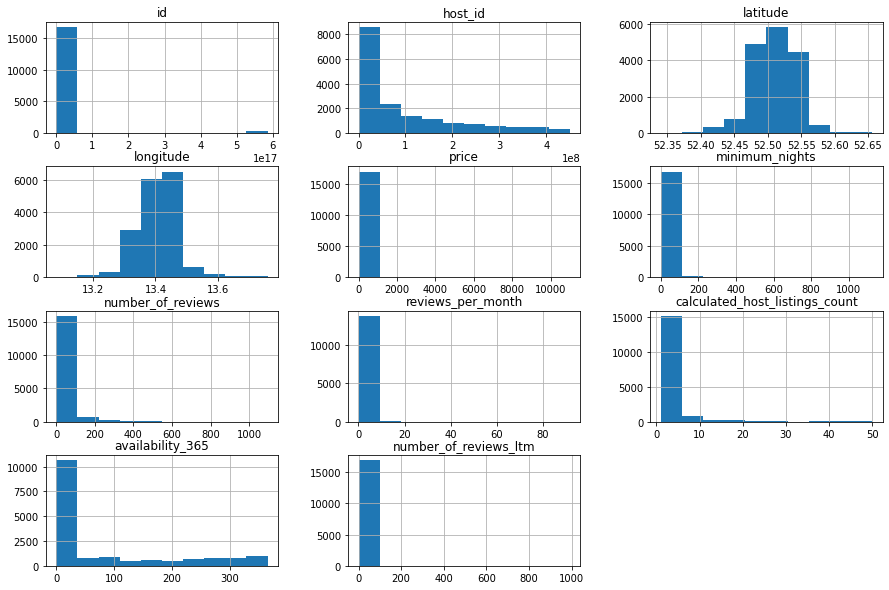

In [ ]:
# plotar o histograma das variáveis numéricas
df.hist(bins = 10, figsize=(15,10));


#Presença de Outliers:

Ao olhar para as distribuições acima, notamos indícios de possíveis outliers nas variáveis `price`, `minimum_nights`, `number_of_reviews_ltm`, `number_of_reviews`, `reviews_per_month`, `number_of_reviews` e `calculated_host_listings_count`.

É visível que os valores não seguem uma distribuição, ou seja, a representação gráfica está distorcida. Para investigar um pouco mais a fundo a presença destes outliers, seguiremos com duas abordagens rápidas:

* Investigar os dados estatísticos da nossa variável (Média, Mediana, desvio padrão), para isso temos comandos como `mean()` ou o método `describe()`, que nos retorna um resumo estatístico das nossas variáveis;
* Plotar `boxplots` para a variável.

### **Q4. Qual a média dos preços de aluguel?**

A média dos preços de aluguel é de €77,46.

In [ ]:
# ver a média da coluna `price``
df.price.mean()
#print("Média de preços:\t {}".format(df.price.mean()))

77.46474472349959

In [ ]:
#Obtendo um resumo estatístico a variável price
df.price.describe()

count    16962.000000
mean        77.464745
std        146.432360
min          0.000000
25%         36.000000
50%         56.000000
75%         89.000000
max      10999.000000
Name: price, dtype: float64

In [ ]:
# ver o resumo estatístico das variáveis numéricas
df[['price','minimum_nights','number_of_reviews','reviews_per_month',
    'calculated_host_listings_count','availability_365','number_of_reviews_ltm']].describe()

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365,number_of_reviews_ltm
count,16962.000000,16962.000000,16962.000000,13825.000000,16962.000000,16962.000000,16962.000000
mean,77.464745,10.857859,24.325080,0.691425,2.910270,77.705990,4.357564
std,146.432360,36.426390,55.462283,1.540381,6.139532,116.864321,16.398155
min,0.000000,1.000000,0.000000,0.010000,1.000000,0.000000,0.000000
25%,36.000000,2.000000,1.000000,0.070000,1.000000,0.000000,0.000000
50%,56.000000,3.000000,5.000000,0.240000,1.000000,0.000000,0.000000
75%,89.000000,5.000000,19.000000,0.770000,2.000000,141.000000,3.000000
max,10999.000000,1124.000000,1096.000000,91.850000,50.000000,365.000000,992.000000



O que podemos observar olhando para o resumo estatístico das nossas variaveis?

* `price`:
>  ▶ O valor Máximo é muito maior que 75% dos valores (que estão abaixo de 89 euros), que pode nos indicar a presença outliers; 

 >  ▶ Outra observação é a diferença entre média e mediana. A média é de `77,46` enquanto a mediana é de `56`


* `minimum_nights`:
 > ▶  A quantidade minima de noites possuí pelo menos uma entrada com valor maior do que 365 dias no ano



#Boxplot para essas duas variáveis

\minimum_nights com valores acima de 30 dias:
1125 entradas
6.6325%


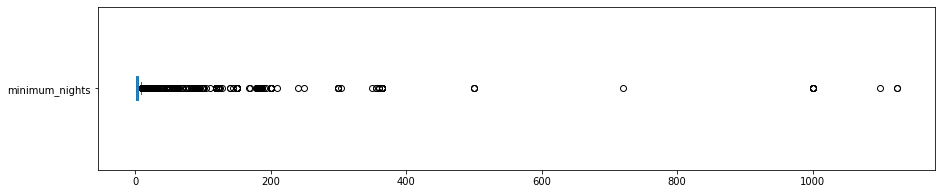

In [ ]:
#boxplot para minimum_nights
df.minimum_nights.plot(kind='box', vert=False, figsize=(15,3))
plt.show

#Ver a quantidade de valores acima de 30 dias:
print("\minimum_nights com valores acima de 30 dias:")
print("{} entradas".format(len(df[df.minimum_nights > 30])))
print("{:.4f}%".format((len(df[df.minimum_nights > 30]) / df.shape[0])*100))

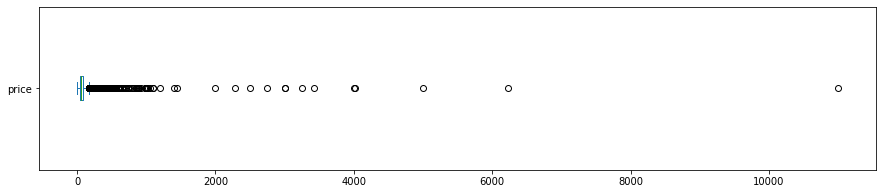


price: valores acima de 200:
225 entradas
3.6434%


In [ ]:
#box plot para price
df.price.plot(kind="box", vert=False, figsize=(15,3))
plt.show()


#Ver quantidade de valores acima de 200 euros
print("\nprice: valores acima de 200:")
print("{} entradas".format(len(df[df.price > 300])))
print("{:.4f}%".format((len(df[df.price>200]) / df.shape[0])*100))

##Histogramas sem outliers

Após identificas a presença de outliers nas variavies `price` e `minimum_nights`, podemos limpar o *DataFrame* e plotar um novo histograma.

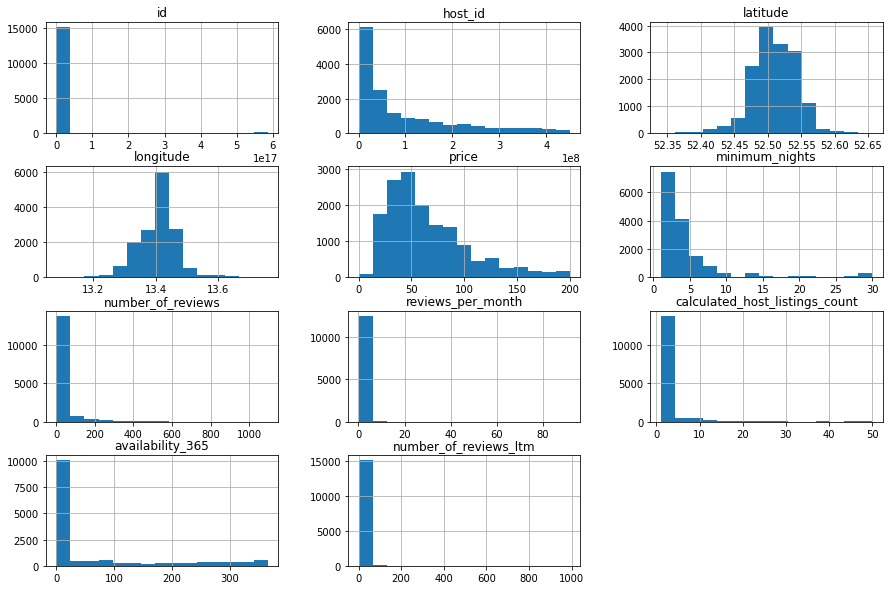

In [ ]:
#Remover outliers criando um nofo dataframe
df_clean = df.copy()
df_clean.drop(df_clean[df_clean.price > 200].index, axis=0, inplace=True)
df_clean.drop(df_clean[df_clean.minimum_nights > 30].index, axis=0, inplace=True)

#plotando novo histograma
df_clean.hist(bins=15, figsize=(15,10));

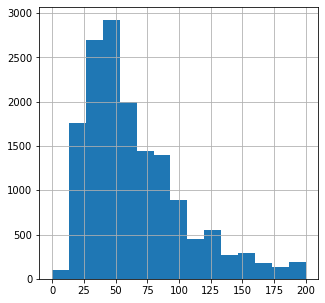

In [ ]:
#Histograma da variável Price
df_clean.price.hist(bins=15, figsize=(5,5));


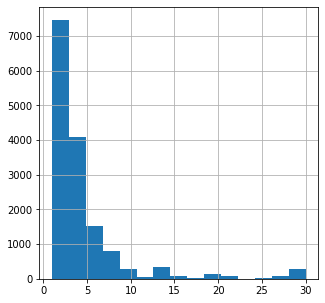

In [ ]:
#Histograma da Variável Minimum_nights
df_clean.minimum_nights .hist(bins=15, figsize=(5,5));

Nota-se que ambos os histogramas são Assimétricos e com apenas um pico. 

Olhando para as variáveis individualmente:

* `price` ▶ A maioria dos imóveis 
disponíveis no Airbnb de Berlim possui diárias entre €25 e €75. Ou seja, embora a média de preços seja de €77,46 a disponibilidade de acomodações com valores ainda mais baixos que esse é grande. Informação que pode ser útil para turistas que estão programando sua viagem pensando em economizar. 

* `minimum_nights` ▶ Grande parte das acomodações possuí quantidade miníma de estadias curtas (entre 1 a 5 dias). Entretanto, existem acomodações em que é necessário estadias acima de 25 dias.

### **Q4. Qual a correlação existente entre as variáveis**

A grosso modo, Correlação é uma medida de quanto as variáveis influenciam umas as outras. 

Em estatística, **Correlação** resume o grau de relacionamento entre duas variáveis (X e Y, por exemplo). O objetivo do estudo da correlação é determinar (mensurar) o grau de relacionamento entre duas variáveis. Mas não entraremos a fundo nisso agora.

A nossa ideia aqui, é encontrar se existe relação ou semelhança entre algumas das variáveis do nosso *Dataset*. Para isso seguiremos os passos a segugir:

* Criar uma matriz de correlação
* Criar um *heatmap* a partir dessa matriz, utilizando a biblioteca `seaborn`


In [ ]:
# criar uma matriz de correlação
corr = df_clean[['price', 'minimum_nights', 'number_of_reviews', 'reviews_per_month',
    'calculated_host_listings_count','availability_365']].corr()

# mostrar a matriz de correlação
display(corr)

,price,minimum_nights,number_of_reviews,reviews_per_month,calculated_host_listings_count,availability_365
price,1.000000,-0.025844,0.101435,0.135370,0.193444,0.335375
minimum_nights,-0.025844,1.000000,-0.091971,-0.101598,0.060712,-0.024519
number_of_reviews,0.101435,-0.091971,1.000000,0.664416,0.072075,0.246627
reviews_per_month,0.135370,-0.101598,0.664416,1.000000,0.110164,0.298913
calculated_host_listings_count,0.193444,0.060712,0.072075,0.110164,1.000000,0.361327
availability_365,0.335375,-0.024519,0.246627,0.298913,0.361327,1.000000


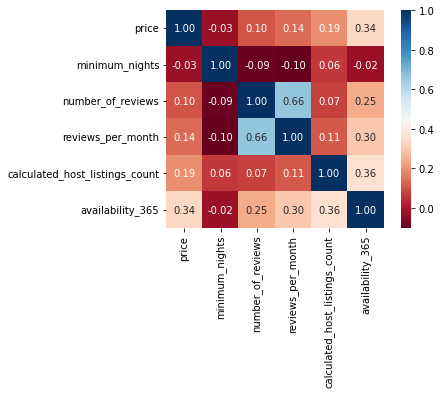

In [ ]:
# plotar um heatmap a partir das correlações
sns.heatmap(corr, cmap='RdBu', fmt='.2f', square=True, 
            linecolor='white', annot=True);

Observando o heatmap acima, notamos que não há nenhuma correlação significativa nas nossa variáveis, temos apenas uma correlação moderada entre `number_of_reviews` e `reviews_per_month`. 

### **Q5. Qual o tipo de imóvel mais alugado no Airbnb?**

Quem já utilizou ou pelo menos pesquisou para alugar utilizando a plataforma Airbnb, sabe que existem opções de diferentes tipos de acomodações. Elas vão de quartos compartilhados até casas/aparamentos inteiros. A coluna `room_type` nos indica qual é o tipo de acomodação.

Utilizando `value_counts()` iremos contar a quantidade de ocorrências para cada tipo anunciado.

In [ ]:
# mostrar a quantidade de cada tipo de imóvel disponível
df_clean.room_type.value_counts()

Entire home/apt    8247
Private room       6668
Shared room         203
Hotel room          127
Name: room_type, dtype: int64

In [ ]:
# mostrar a porcentagem de cada tipo de imóvel disponível
df_clean.room_type.value_counts() / df_clean.shape[0]

Entire home/apt    0.540964
Private room       0.437389
Shared room        0.013316
Hotel room         0.008331
Name: room_type, dtype: float64

Nota-se que dos imóveis disponíveis `54%` são Casas/Aptos inteiros e  `43%` são Quartos privados totalizando mais de `97%`  dos imóveis disponíveis na plataforme em Berlim.



### **Q6. Qual a localidade mais cara do dataset?**

Para encontrar este dado, precisamos verificar uma variável em função de outra utilizando `groupby()`. Ou seja, iremos comparar os bairros a partir do preço de locação.

Ao olhar para o dataset e observamos que ambas as colunas `neighbourhood_group` e `neighbourhood` possuiam dados, portanto, foi necessário entender a diferença entre as duas informações.

Após uma pesquisa rápida, descobrimos que Berlim é dividia em 12 distritos e espalhados por estes temos 96 localidades (ou bairros) diferentes. Para nossa análise iremos utilizar a divisão maior, ou seja, os distritos.

<center><img alt="Distritos Berlin" widht= "1%" src="https://github.com/GabrielCandido97/Portfolio_Data_Science/blob/main/distritosBerlim.png?raw=true" >
Figura: Mapa de Berlim 




In [ ]:
# ver preços por bairros em média (trazendo apenas os 10 valores mais altos)
df_clean.groupby(['neighbourhood_group']).price.mean().sort_values(ascending=False)

neighbourhood_group
Mitte                       70.813651
Pankow                      69.536768
Charlottenburg-Wilm.        67.929688
Marzahn - Hellersdorf       65.982301
Steglitz - Zehlendorf       65.655271
Friedrichshain-Kreuzberg    64.161012
Treptow - Köpenick          63.777184
Spandau                     63.101124
Tempelhof - Schöneberg      62.399221
Reinickendorf               55.607477
Lichtenberg                 54.556436
Neukölln                    52.789354
Name: price, dtype: float64

Como meu conhecimento sobre Berlim não é tão apurado, pesquisaremos a respeito dos 3 bairros com média mais cara de aluguel para entender se faz sentido.

* **Mitte**
  * Bairro Central de Berlim
  * Um dos bairros mais famosos e conhecidos pelos turistas
  * Possuí grande parte dos passeios turísticos da cidade (Torre de Televisão, Portão de Brandemburgo, Catedral de Berlim, entre outros)
* **Pankow**
  * Segundo maior bairro da cidade, e o mais populoso
  * Fazia parta da Berlim Oriental
  * Nele fica o bairro Prenzlauer Berg considerado uma da regiões mais descoladas de Berlim com diversas opções de cafés, restaurantes e lojas
  * Possuí diversos pontos turísticos
* **Charlottenburg-Wilm.**
  * Nele fica a Kurfürstendamm ou simplesmente Kudamm como é comumente chamada é uma das avenidas mais famosas de Berlim.
  * Uma das regiões mais ricas de Berlim, com muitas opçoes para compras
  * Possuí diversos pontos turísticos



Como são fornecidas as Latitudes e Longitudes para cada imóvel, podemos plotar cada ponto consideranto `x=longitude` e `y=latitude`. É possível observar o formato do Mapa de Berlim.

Abaixo, observamos a distribuição das acomodações por Berlim e as cores nos indicam o preço.

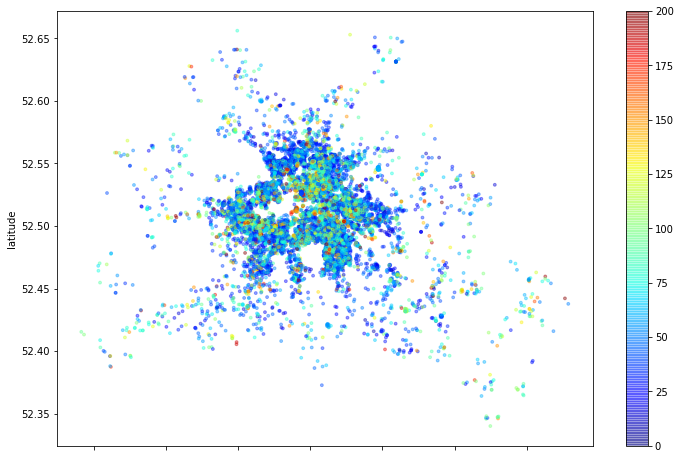

In [ ]:
# plotar os imóveis pela latitude-longitude
df_clean.plot(kind='scatter', x='longitude', y='latitude', alpha=0.4, 
              c=df_clean['price'], s=8, cmap=plt.get_cmap('jet'), figsize=(12,8));

### **Q7. Qual é a média do mínimo de noites para aluguel (minimum_nights)?**

In [ ]:
# ver a média da coluna `minimum_nights``
print("Média do mínimo de noites para aluguel:\t{}".format(df_clean.minimum_nights.mean()))

Média do mínimo de noites para aluguel:	4.163922597572975


## Conclusões


Nota-se que apenas realizando uma análise exploratória superficial dos dados é possível entender um pouco mais sobre o Dataset e obter insights. 

Foi possível observar a presença de outliers e valores ausentes (que podem poluir e distorcer a análise das variáveis) e após uma pequeno tratamento destes dados (remoção de outliers para as variáveis de interesse) obteve-se algumas informações a respeito do Airbnb em Berlim. 

Entedemos que embora a média de preço para locação de acomodações seja de €77,46 a maioria das acomodações disponíveis está abaixo deste valor e que também existem possilidades com preços muitos maiores. Descobrimos também, ao procurar pelas localidades mais caras, que a média de preço dos três bairros mais caros de Berlim é coerente , pois após uma pesquisa rápida entendemos que ambos são bairros famosos que possuem pontos turísticos e infraestrutura. 

Sendo assim, a análise exploratória abre margem para diversas perguntas, observações e ideias. Ou seja, se com uma pequena análise a partir de um dataset resumido consegui-se responder as questões acima, em uma análise futura utilizando o dataset completo e de forma mais aprofundada, é possível obter um valor enorme a partir dos dados. 



